In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds = pd.read_csv('Volume_price.csv')

In [3]:
ds.head()

,Volume,Price
0,10,393.10
1,11,471.91
2,14,751.66
3,16,974.26
4,17,1096.39


In [4]:
ds.shape

(23, 2)

In [5]:
x = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values

In [6]:
corr = ds.corr()
print(corr)

          Volume     Price
Volume  1.000000  0.881423
Price   0.881423  1.000000


## Use Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 4)  # 2 means quadratic
x_poly = poly_reg.fit_transform(x)
regressor = LinearRegression()
regressor.fit(x_poly,y)

LinearRegression()

Excercise:

Change the degree of Polynomial Regression in fitting the model.

In [16]:
print('The coefficient is:', regressor.coef_)
print('The y-intercept is:', regressor.intercept_)

The coefficient is: [ 0.00000000e+00 -5.96571577e+02  3.39067529e+01 -5.98244217e-01
  3.98138223e-03]
The y-intercept is: 3852.087895431866


The polynomial equation is
$$ y = 5798.927879172009 -419.28751201x + 9.47021034x^2$$

---

## Predict

Question:
    
Predict the price when the volume is 35.

In [17]:
y_predict = regressor.predict(poly_reg.fit_transform([[35]]))
print(y_predict)

[4832.69589184]


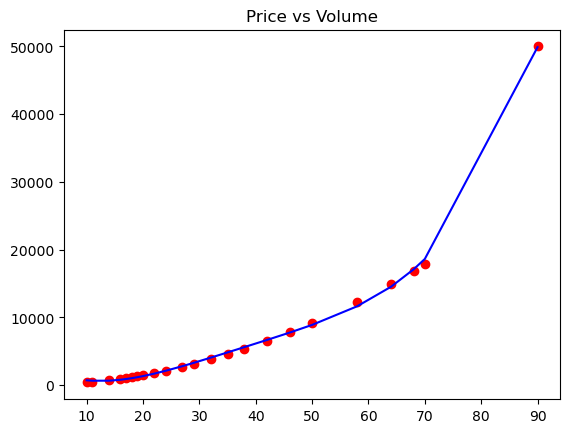

In [18]:
plt.scatter(x,y,color='red')
plt.plot(x, regressor.predict(poly_reg.fit_transform(x)), color='blue')
plt.title('Price vs Volume')
plt.show()